In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv


In [88]:
#creating a dataframe out of the input provided using pandas library

df = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')

**EDA**

In [89]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [90]:
# Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


we could see non-null constraint imposed on all the columns, we could also check the data for null values using the below code.

In [91]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

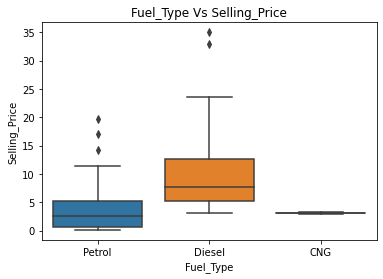

In [92]:
# Using seaborn- boxplot to visualize the relationship between dependent variable(SP) and other independent variables.
plt.title('Fuel_Type Vs Selling_Price')
sns.boxplot(df['Fuel_Type'], df['Selling_Price'])


form the above plot we could infer that most of the data provided is based on Bio-Fuels especially Diesel and Petrol. Diesel based Vehicle are costlier than others.

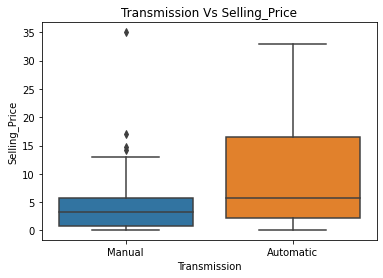

In [93]:
plt.title('Transmission Vs Selling_Price')
sns.boxplot(df['Transmission'], df['Selling_Price'])


In [94]:
#we could see that automatic transmission cars are costlier than manual.

In [95]:
all_cls=df.columns
numeric_cols=df._get_numeric_data().columns.to_list()
cat_cols=list(set(all_cls)-set(numeric_cols))

In [96]:
df.drop(['Car_Name'],inplace=True,axis=1)

In [97]:
df['age']=df['Year']-2020

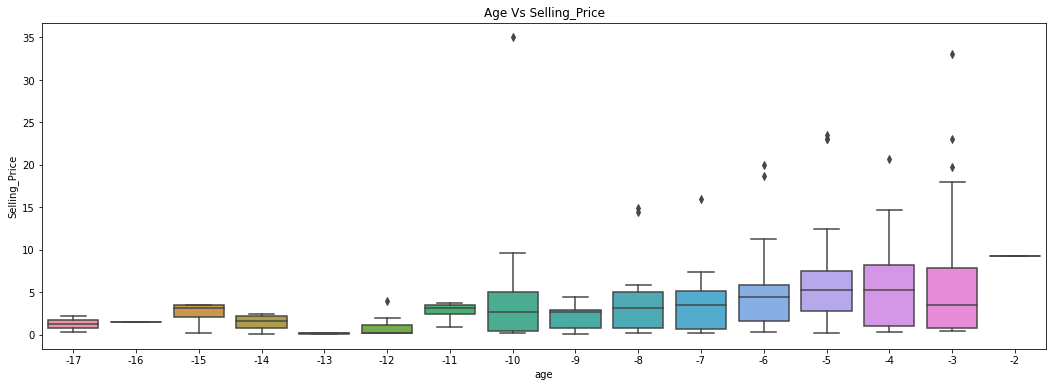

In [98]:
fig_dims = (18,6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Age Vs Selling_Price')
sns.boxplot(df['age'], df['Selling_Price'], ax=ax, data=df)

In [99]:
df.drop(['Year'],inplace=True,axis=1)

In [100]:
df=pd.get_dummies(df,drop_first=True)

In [101]:
y=df.pop('Selling_Price')
X=df

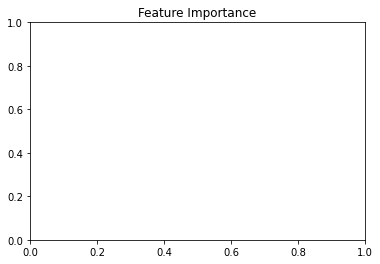

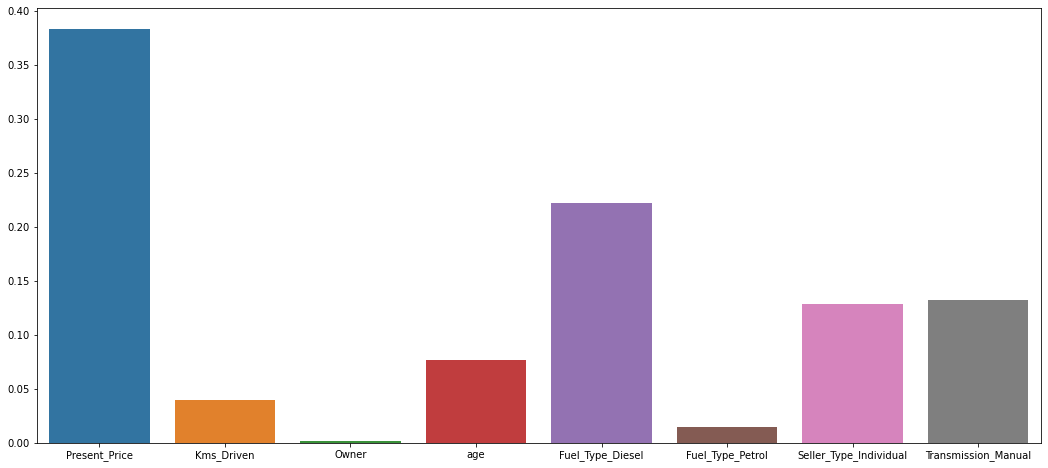

In [108]:
from sklearn.ensemble import ExtraTreesRegressor
md=ExtraTreesRegressor()
md.fit(X,y)

plt.figure(figsize=(18,8))
plt.title('Feature Importance')
sns.barplot(x=df.columns, y=md.feature_importances_)

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [105]:
y_pred=lr.predict(X_test)

In [106]:
y_pred

array([ 2.53,  1.99, -0.31,  0.32, -0.87,  1.51, 10.19,  7.65,  7.1 ,
       10.55,  4.54,  4.37,  7.1 ,  4.81,  6.44,  0.32,  4.91,  7.27,
       -0.13,  4.34,  3.64,  5.22,  1.08,  6.5 ,  6.56,  1.13,  5.86,
        4.71, 19.96,  8.99,  0.35,  3.61,  4.5 ,  4.17,  3.58,  6.62,
        8.17, 10.21,  7.73,  1.03, -2.37,  6.73,  1.08,  5.17,  2.08,
        2.3 ,  7.06, 11.32,  4.37,  8.32,  2.71,  1.36,  1.78,  1.79,
        7.08,  4.6 ,  4.99,  0.92, -0.45, 18.3 ,  6.46,  1.96,  3.51,
        4.34, 20.53,  0.52,  7.63, -0.8 ,  7.7 ,  4.11,  7.1 ,  1.5 ,
        2.45,  2.69,  3.11,  7.26])

Evaluating the model

In [107]:
from sklearn.metrics import mean_squared_error
rmse_value=mean_squared_error(y_test, y_pred,squared=False)
print(rmse_value)

1.4254497883841302
